In [1]:
from lma.resample import *
from lma.plot import *

In [2]:
datasets = ['datasets/zebrafish_retina_temporal.txt',
            'datasets/zebrafish_retina_middle.txt',
            'datasets/zebrafish_retina_nasal.txt']

dataset_names = ['Temporal region', 'Middle region', "Nasal region"]

## Doublet motif analysis

In [3]:
num_resamples = 10000

In [4]:
(subtree_dict, 
 cell_fates, 
 dfs_dataset_concat) = multi_dataset_resample_trees(datasets, 
                                                    dataset_names,
                                                    'doublet',
                                                    num_resamples, 
                                                    False, 
                                                    )

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [5]:
subtree_dict

{'(A,A)': 0,
 '(A,B)': 1,
 '(A,G)': 2,
 '(A,H)': 3,
 '(A,M)': 4,
 '(A,R)': 5,
 '(B,B)': 6,
 '(B,G)': 7,
 '(B,H)': 8,
 '(B,M)': 9,
 '(B,R)': 10,
 '(G,G)': 11,
 '(G,H)': 12,
 '(G,M)': 13,
 '(G,R)': 14,
 '(H,H)': 15,
 '(H,M)': 16,
 '(H,R)': 17,
 '(M,M)': 18,
 '(M,R)': 19,
 '(R,R)': 20}

In [6]:
cell_fates

['A', 'B', 'G', 'H', 'M', 'R']

In [7]:
dfs_dataset_concat.head()

,0,1,2,3,4,5,6,7,8,9,...,9993,9994,9995,9996,9997,9998,9999,observed,expected,dataset
0,1.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,6.0,4.0,...,4.0,2.0,4.0,2.0,2.0,4.0,2.0,9.0,3.722652,Temporal region
1,4.0,4.0,10.0,3.0,5.0,5.0,6.0,5.0,0.0,8.0,...,6.0,3.0,6.0,4.0,8.0,4.0,9.0,2.0,5.118646,Temporal region
2,3.0,1.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,1.0,...,2.0,2.0,1.0,2.0,1.0,3.0,2.0,0.0,1.628660,Temporal region
3,4.0,1.0,2.0,1.0,3.0,3.0,0.0,4.0,1.0,3.0,...,4.0,2.0,5.0,2.0,1.0,3.0,4.0,2.0,2.791989,Temporal region
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.232666,Temporal region


In [8]:
(df_true_melt_dataset_label_concat_concat,
 df_melt_subset_concat_concat, 
 df_melt_100resamples_subset_concat_concat,
 df_zscores_i_concat_melt_subset_concat_concat,
 df_zscores_i_concat_melt_100resamples_subset_concat_concat) = multi_dataset_dfs_for_plotting(dfs_dataset_concat, 
                                                                                              dataset_names, 
                                                                                              10000, 
                                                                                              subtree_dict,
                                                                                              cutoff='auto',
                                                                                              num_null=100)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [14]:
df_true_melt_dataset_label_concat_concat.head()

,subtree_val,observed,expected,z-score,abs z-score,label,min,mean,max,adj_p_val,dataset,z-score min,z-score mean,z-score max
20,20,21.0,8.728601,6.483211,6.483211,"(R,R)",1.0,8.6400,17.0,0.002100,Temporal region,-2.959802,0.017841,3.338046
15,15,5.0,0.523498,6.985144,6.985144,"(H,H)",0.0,0.4851,4.0,0.002100,Temporal region,-0.750572,-0.010939,3.894024
6,6,9.0,1.759535,6.634465,6.634465,"(B,B)",0.0,1.6954,7.0,0.002100,Temporal region,-1.540121,0.011462,3.912877
1,1,2.0,5.118646,-1.690544,1.690544,"(A,B)",0.0,5.1833,13.0,1.480204,Temporal region,-2.753858,0.046595,3.622677
0,0,9.0,3.722652,3.587512,3.587512,"(A,A)",0.0,3.6319,11.0,0.020996,Temporal region,-2.428043,-0.077465,2.920600


In [15]:
df_melt_subset_concat_concat.head()

,subtree_val,observed,label,dataset
200000,20,7.0,"(R,R)",Temporal region
200001,20,7.0,"(R,R)",Temporal region
200002,20,10.0,"(R,R)",Temporal region
200003,20,8.0,"(R,R)",Temporal region
200004,20,10.0,"(R,R)",Temporal region


In [16]:
df_melt_100resamples_subset_concat_concat.head()

,subtree_val,observed,label,dataset
2000,20,7.0,"(R,R)",Temporal region
2001,20,7.0,"(R,R)",Temporal region
2002,20,10.0,"(R,R)",Temporal region
2003,20,8.0,"(R,R)",Temporal region
2004,20,10.0,"(R,R)",Temporal region


In [17]:
df_zscores_i_concat_melt_subset_concat_concat.head()

,subtree_val,observed,label,dataset
20000,20,-0.860307,"(R,R)",Temporal region
20001,20,-0.860307,"(R,R)",Temporal region
20002,20,0.713417,"(R,R)",Temporal region
20003,20,-0.335719,"(R,R)",Temporal region
20004,20,0.713417,"(R,R)",Temporal region


In [18]:
df_zscores_i_concat_melt_100resamples_subset_concat_concat.head()

,subtree_val,observed,label,dataset
2000,20,-0.860307,"(R,R)",Temporal region
2001,20,-0.860307,"(R,R)",Temporal region
2002,20,0.713417,"(R,R)",Temporal region
2003,20,-0.335719,"(R,R)",Temporal region
2004,20,0.713417,"(R,R)",Temporal region


In [19]:
dataset_color_dict = make_color_dict(dataset_names, ['#712D1B', 
                                                     '#EC7960', 
                                                     '#9E9E36', 
                                                     ])

cell_color_dict = make_color_dict(cell_fates, ['#7EC352', 
                                               '#F89A3A', 
                                               '#9C80B8', 
                                               '#F071AB', 
                                               '#F0E135', 
                                               '#5FC0D4'])

In [20]:
subtree = 'doublet'

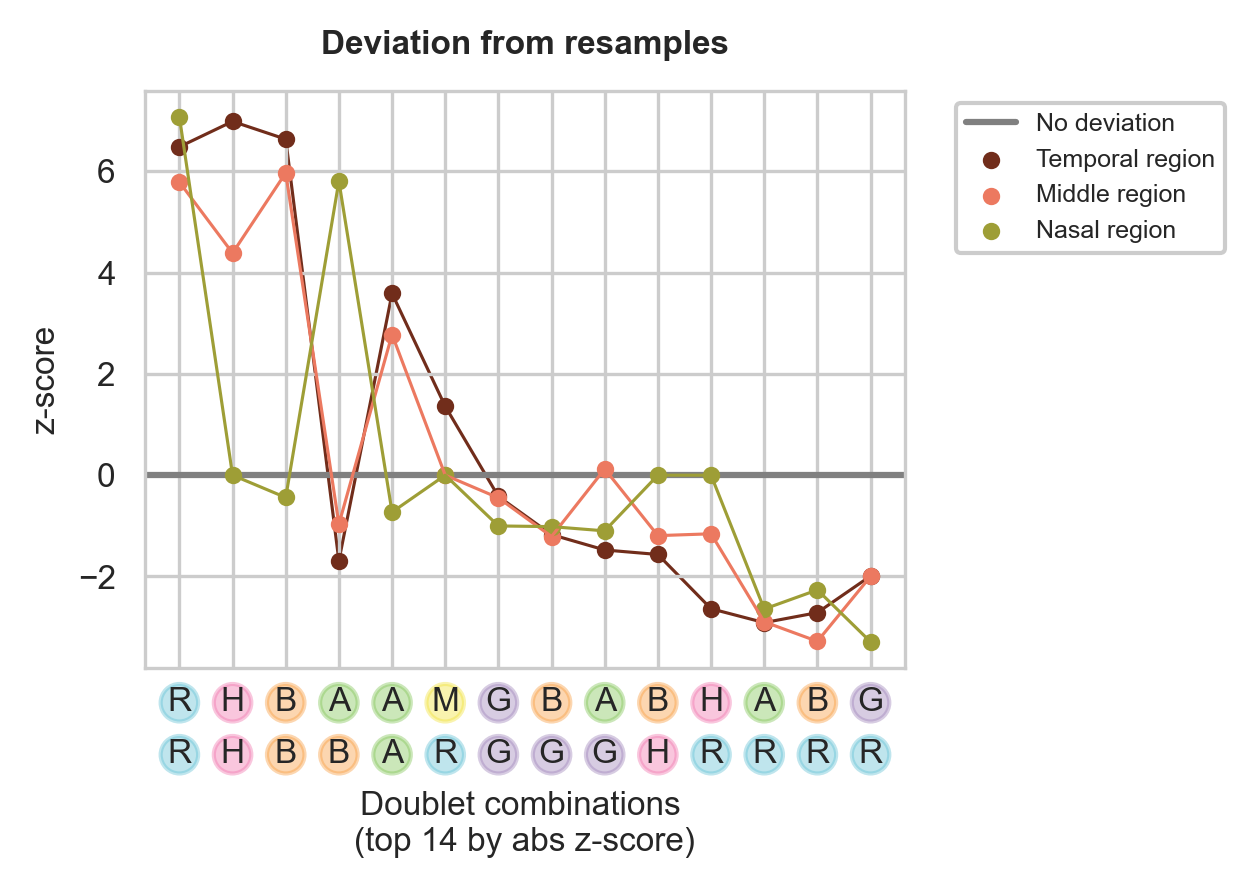

In [21]:
multi_dataset_plot_deviation(subtree, 
                             dataset_names,
                             df_true_melt_dataset_label_concat_concat, 
                             dataset_color_dict,
                             cell_color_dict,
                             cutoff='auto', 
                             legend_bool=True,
                             legend_pos='outside',
                             save=False, 
                             image_format='png',
                             dpi=300,
                             image_save_path=None)

## Triplet motif analysis

In [22]:
(subtree_dict, 
 cell_fates, 
 dfs_dataset_concat) = multi_dataset_resample_trees(datasets, 
                                                    dataset_names,
                                                    'triplet',
                                                    num_resamples, 
                                                    False, 
                                                    )

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [30]:
cutoff=15

In [31]:
(df_true_melt_dataset_label_concat_concat,
 df_melt_subset_concat_concat, 
 df_melt_100resamples_subset_concat_concat,
 df_zscores_i_concat_melt_subset_concat_concat,
 df_zscores_i_concat_melt_100resamples_subset_concat_concat) = multi_dataset_dfs_for_plotting(dfs_dataset_concat, 
                                                                                              dataset_names, 
                                                                                              10000, 
                                                                                              subtree_dict,
                                                                                              cutoff=cutoff,
                                                                                              num_null=1)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
subtree = 'triplet'

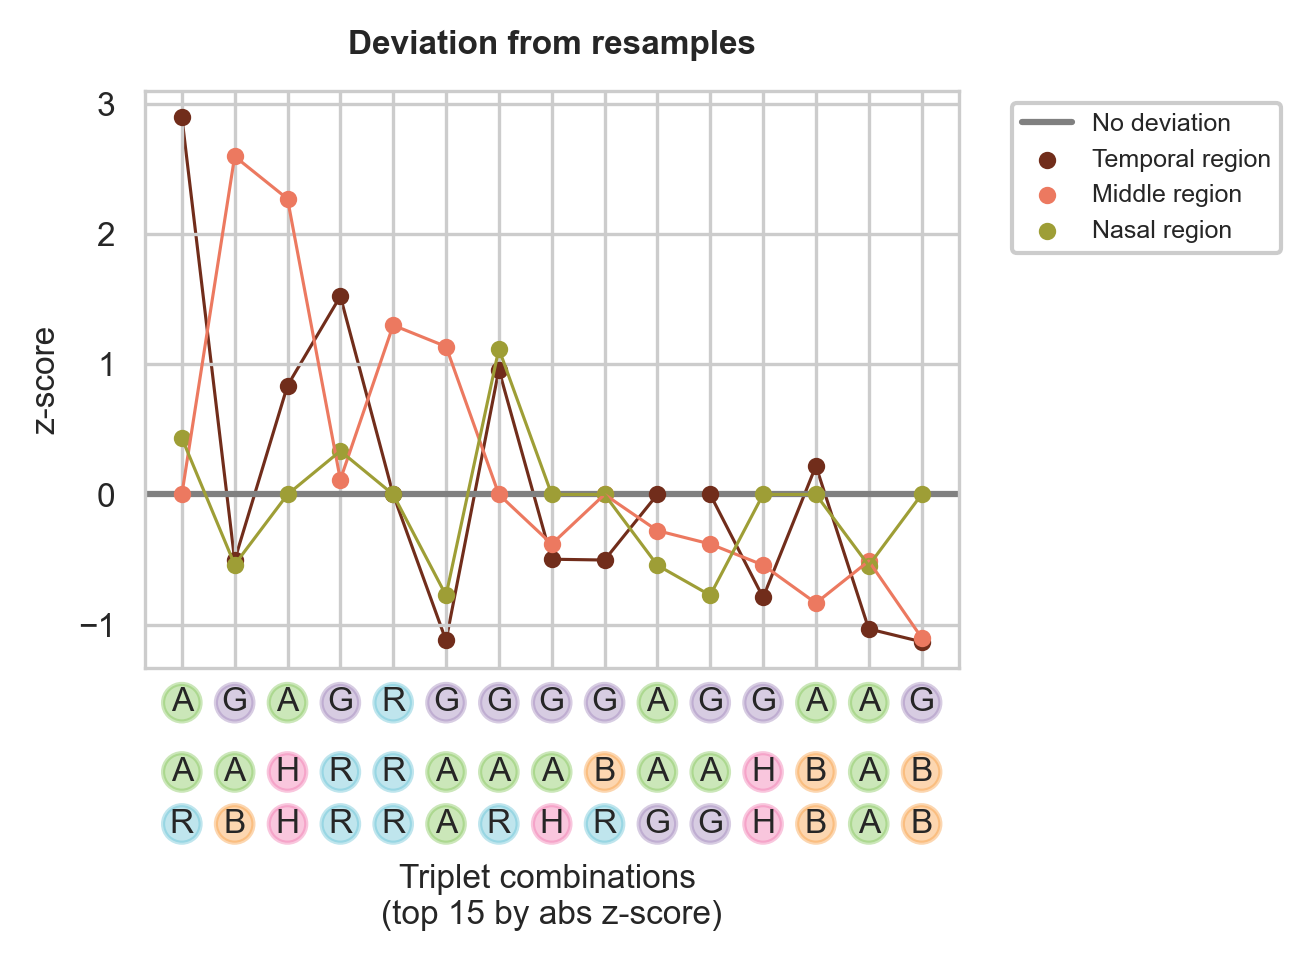

In [33]:
multi_dataset_plot_deviation(subtree, 
                             dataset_names,
                             df_true_melt_dataset_label_concat_concat, 
                             dataset_color_dict,
                             cell_color_dict,
                             cutoff=cutoff, 
                             legend_bool=True,
                             legend_pos='outside',
                             save=False, 
                             image_format='png',
                             dpi=300,
                             image_save_path=None)

## Quartet motif analysis

In [38]:
(subtree_dict, 
 cell_fates, 
 dfs_dataset_concat) = multi_dataset_resample_trees(datasets, 
                                                    dataset_names,
                                                    'quartet',
                                                    num_resamples, 
                                                    False, 
                                                    )

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [39]:
cutoff=15

In [40]:
(df_true_melt_dataset_label_concat_concat,
 df_melt_subset_concat_concat, 
 df_melt_100resamples_subset_concat_concat,
 df_zscores_i_concat_melt_subset_concat_concat,
 df_zscores_i_concat_melt_100resamples_subset_concat_concat) = multi_dataset_dfs_for_plotting(dfs_dataset_concat, 
                                                                                              dataset_names, 
                                                                                              10000, 
                                                                                              subtree_dict,
                                                                                              cutoff=cutoff,
                                                                                              num_null=1)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [41]:
subtree = 'quartet'

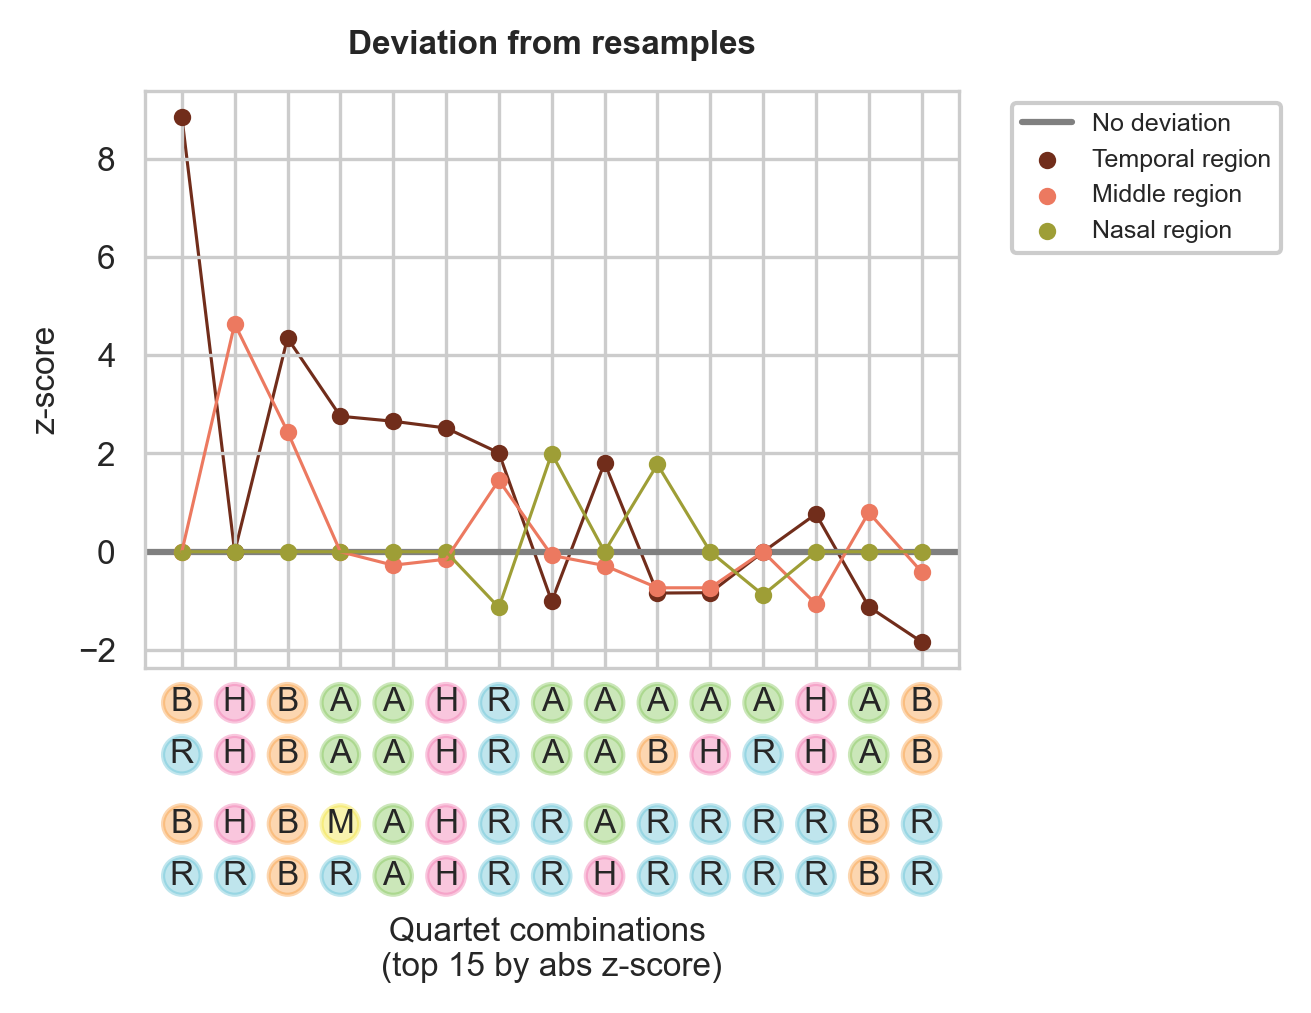

In [42]:
multi_dataset_plot_deviation(subtree, 
                             dataset_names,
                             df_true_melt_dataset_label_concat_concat, 
                             dataset_color_dict,
                             cell_color_dict,
                             cutoff=cutoff, 
                             legend_bool=True,
                             legend_pos='outside',
                             save=False, 
                             image_format='png',
                             dpi=300,
                             image_save_path=None)